In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats


In [2]:
ff= pd.read_csv('Cutlets.csv')

## h0: u1=u2: there is not difference 
## h1: u1!=u2 there is a difference in unit A and unit B 

In [3]:
ff

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [63]:
## data ranges between -0.1 and 1 
ff.skew()

Unit A   -0.123684
Unit B   -0.379945
dtype: float64

In [45]:
##Normalizaing data

unitAn = stats.boxcox(unitA)
unitBn = stats.boxcox(unitB)

Text(0.5, 1.0, 'Normalized data')

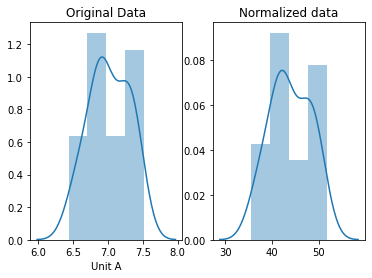

In [50]:
import seaborn as sns


fig, ax=plt.subplots(1,2)
sns.distplot(unitA, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(unitAn[0], ax=ax[1])
ax[1].set_title("Normalized data")


Text(0.5, 1.0, 'Normalized data')

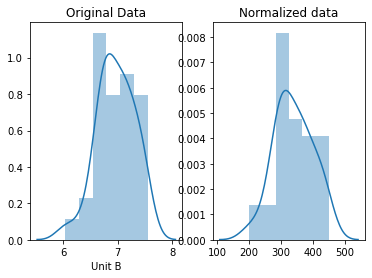

In [52]:
fig, ax=plt.subplots(1,2)
sns.distplot(unitB, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(unitBn[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [5]:
ff.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [8]:
f1= ff.head(10)
f1

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [22]:
unitA= pd.Series(ff.iloc[:,0])
unitB= pd.Series(ff.iloc[:,1])

In [23]:
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [24]:
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [25]:
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

In [27]:
#Taking Decision as per P value
p=p_value[1]
p

0.4722394724599501

In [31]:
a= alpha= 0.05
a

0.05

In [32]:

if p>a:
    print(' There is no difference in diameter between two cutlets')
    
else: 
    print('There is a difference in diameter between two cutlets')

 There is no difference in diameter between two cutlets
